# First training using the simple negation data

In [1]:
# all imports
import numpy as np
import pandas as pd
import torch
from torchtext import data
import torch.optim as optim

import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions  import plot_confusion_matrix, plot_histogram_from_labels
from text_processing.functions import simple_pre_process_text_df, simple_pre_process_text

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
train_data_path = os.path.join(parentdir,
                               "text_generator",
                                "b1_train.csv")

test_data_path = os.path.join(parentdir,
                              "text_generator",
                              "b1_test.csv")

In [3]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [4]:
train_data.head()

sentence1                sentence2  label
0    Winston is lively     Brooklyn is not nice      0
1     Reynold is witty   Quanda is not thankful      0
2       Hazel is brave     Charity is not witty      0
3    Sutcliff is silly    Lyle is not ambitious      0
4  Banner is ambitious  Banner is not ambitious      1

In [5]:
test_data.head()

sentence1                  sentence2  label
0    Radella is jolly       Radella is not jolly      1
1     Harris is proud  Westcott is not ambitious      0
2  Ellery is obedient    Josie is not delightful      0
3        Win is brave        Esmond is not eager      0
4     Everly is eager        Osborn is not happy      0

## Putting the sentences together

In [6]:
train_data["text"] = train_data["sentence1"]  + ", " + train_data["sentence2"]
test_data["text"] = test_data["sentence1"]  + ", " + test_data["sentence2"]
train_data.drop(["sentence1", "sentence2"], axis=1, inplace=True)
test_data.drop(["sentence1", "sentence2"], axis=1, inplace=True)
train_data = train_data[["text", "label"]]
test_data = test_data[["text", "label"]] 

In [7]:
train_data.head()

text  label
0       Winston is lively, Brooklyn is not nice      0
1      Reynold is witty, Quanda is not thankful      0
2          Hazel is brave, Charity is not witty      0
3      Sutcliff is silly, Lyle is not ambitious      0
4  Banner is ambitious, Banner is not ambitious      1

In [8]:
train_data[train_data['label']==1]

text  label
4         Banner is ambitious, Banner is not ambitious      1
7                   Letty is witty, Letty is not witty      1
8                     Manny is calm, Manny is not calm      1
11              Filmore is witty, Filmore is not witty      1
13            Cady is agreeable, Cady is not agreeable      1
15              Quixley is happy, Quixley is not happy      1
16                Bronson is kind, Bronson is not kind      1
20      Harrison is thankful, Harrison is not thankful      1
24                Wolcott is calm, Wolcott is not calm      1
25                Pistol is brave, Pistol is not brave      1
29                Locke is lively, Locke is not lively      1
31            Annalee is polite, Annalee is not polite      1
32                Unity is gentle, Unity is not gentle      1
33                  Blake is jolly, Blake is not jolly      1
36        Peyton is ambitious, Peyton is not ambitious      1
37                    Burl is eager, Burl is not eager      1
38      Blackburn is zealous, Blackburn is not zealous      1
40                    Faye is eager, Faye is not eager      1
44                  Oakley is nice, Oakley is not nice      1
45                Darton is eager, Darton is not eager      1
47        Skeet is delightful, Skeet is not delightful      1
48                    Ever is brave, Ever is not brave      1
50          Ceil is aggressive, Ceil is not aggressive      1
51                        Win is kind, Win is not kind      1
52              Pierce is gentle, Pierce is not gentle      1
53        Graham is wonderful, Graham is not wonderful      1
57                Robert is eager, Robert is not eager      1
58              Janet is zealous, Janet is not zealous      1
59                Paxton is eager, Paxton is not eager      1
60    Marlowe is aggressive, Marlowe is not aggressive      1
...                                                ...    ...
9939                Pelham is calm, Pelham is not calm      1
9941      Kinsley is faithful, Kinsley is not faithful      1
9942          Sherlock is silly, Sherlock is not silly      1
9947          Finnick is polite, Finnick is not polite      1
9949              Audrey is proud, Audrey is not proud      1
9950                    Lucy is calm, Lucy is not calm      1
9951            Jayleen is eager, Jayleen is not eager      1
9953          Kitty is faithful, Kitty is not faithful      1
9955      Wilton is agreeable, Wilton is not agreeable      1
9956                Lacey is proud, Lacey is not proud      1
9965      Rowley is agreeable, Rowley is not agreeable      1
9967              Aubrey is jolly, Aubrey is not jolly      1
9968        Stanford is gentle, Stanford is not gentle      1
9969              Annalee is nice, Annalee is not nice      1
9971          Annesley is brave, Annesley is not brave      1
9974                Maida is brave, Maida is not brave      1
9975        Squall is faithful, Squall is not faithful      1
9976            Lane is thankful, Lane is not thankful      1
9977                  Fear is proud, Fear is not proud      1
9978                  Royce is kind, Royce is not kind      1
9980        Henderson is silly, Henderson is not silly      1
9981      Northcliff is jolly, Northcliff is not jolly      1
9982                    Tory is nice, Tory is not nice      1
9983            Wilfred is brave, Wilfred is not brave      1
9989        Jetta is agreeable, Jetta is not agreeable      1
9991        Barton is obedient, Barton is not obedient      1
9992      Manny is aggressive, Manny is not aggressive      1
9993        Calbert is zealous, Calbert is not zealous      1
9995        Hadleigh is polite, Hadleigh is not polite      1
9998                      Rob is calm, Rob is not calm      1

[5029 rows x 2 columns]

In [9]:
labels_legend = ['no', 'yes']
anwser2int = {'no':0, 'yes':1}
int2anwser = {i[1]: i[0] for i in anwser2int.items()}
train_labels = [int2anwser[i] for i in train_data["label"].values]
test_labels = [int2anwser[i] for i in train_data["label"].values]

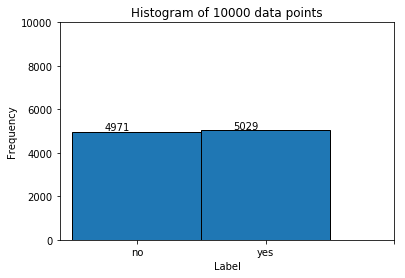

In [10]:
plot_histogram_from_labels(train_labels, labels_legend, "train data")

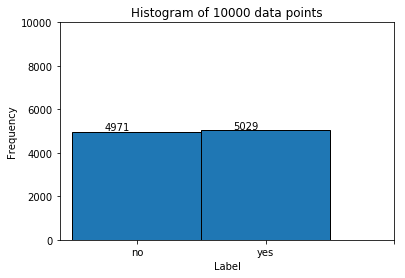

In [11]:
plot_histogram_from_labels(test_labels, labels_legend, "train data")

### Applying preprocessing function

In [12]:
print("\n=== AFTER using the function simple_pre_process_text_df ===\n")
simple_pre_process_text_df(train_data)
simple_pre_process_text_df(test_data)
print(train_data["text"].values[2])
print()
print(train_data["text"].values[3])
print()
print(train_data["text"].values[4])


=== AFTER using the function simple_pre_process_text_df ===

hazel is brave charity is not witty

sutcliff is silly lyle is not ambitious

banner is ambitious banner is not ambitious


## Saving the new version of the data in a csv

In [13]:
train_data_path = os.path.join(parentdir,
                               "text_generator",
                                "b1_train_processed.csv")

test_data_path = os.path.join(parentdir,
                              "text_generator",
                              "b1_test_processed.csv")


train_data.to_csv(train_data_path, header=False, index=False)
test_data.to_csv(test_data_path, header=False, index=False)

### Starting with torch

We use the `data.Field` to hold all the text data:

> Field class models common text processing datatypes that can be represented
by tensors.  It holds a Vocab object that defines the set of possible values
for elements of the field and their corresponding numerical representations.
The Field object also holds other parameters relating to how a datatype
should be numericalized, such as a tokenization method and the kind of
Tensor that should be produced.

and the class `data.LabelField` to hold the labels:

> A label field is a shallow wrapper around a standard field designed to hold labels
for a classification task. Its only use is to set the unk_token and sequential to `None` by default.

In [14]:
TEXT = data.Field(tokenize='spacy')
LABEL = data.LabelField(tensor_type=torch.FloatTensor)

And so we can create a dataset by using the class `data.TabularDataset` and the data in the `csv` format

In [15]:
train = data.TabularDataset(path=train_data_path,
                            format="csv",
                            fields=[('text', TEXT), ('label', LABEL)])

test = data.TabularDataset(path=test_data_path,
                            format="csv",
                            fields=[('text', TEXT), ('label', LABEL)])

Creating the train-valid split (80$\%$ for training data and 20$\%$ for validation data)

In [16]:
train, valid = train.split(0.8)

In [17]:
print('len(train):', len(train))
print('len(valid):', len(valid))
print('len(test):', len(test))

len(train): 8000
len(valid): 2000
len(test): 1000


Constructing the Vocabulary, using at maximun 25000 words

In [18]:
TEXT.build_vocab(train, max_size=25000)
LABEL.build_vocab(train)

In [19]:
print('len(TEXT.vocab):', len(TEXT.vocab))
print('len(LABEL.vocab):', len(LABEL.vocab))

len(TEXT.vocab): 1335
len(LABEL.vocab): 2


Printing the 20 most frequent words

In [20]:
print(TEXT.vocab.freqs.most_common(20))

[('is', 16000), ('not', 8000), ('victorious', 768), ('nice', 741), ('polite', 737), ('brave', 732), ('thankful', 732), ('obedient', 725), ('ambitious', 720), ('gentle', 716), ('eager', 709), ('wonderful', 696), ('proud', 693), ('aggressive', 692), ('jolly', 687), ('kind', 685), ('silly', 680), ('agreeable', 677), ('lively', 674), ('calm', 663)]


- `.itos` is the `int2str` method from the object `TEXT.vocab` 
- `.stoi` is the `str2int` method from the object `TEXT.vocab` 

In [21]:
print("TEXT.vocab.itos")
print("word", "index")

for i, word in enumerate(TEXT.vocab.itos[:10]):
    print(word, i)


print()
print("TEXT.vocab.stoi")
print("word", "index")
for word in "i love trump".split():
    print(word, TEXT.vocab.stoi[word])

TEXT.vocab.itos
word index
<unk> 0
<pad> 1
is 2
not 3
victorious 4
nice 5
polite 6
brave 7
thankful 8
obedient 9

TEXT.vocab.stoi
word index
i 0
love 751
trump 0


In [22]:
class RNNConfig(object):
    """
    Holds logistic regression model hyperparams.
    
    :param height: image height
    :type heights: int
    :param width: image width
    :type width: int
    :param channels: image channels
    :type channels: int
    :param batch_size: batch size for training
    :type batch_size: int
    :param epochs: number of epochs
    :type epochs: int
    :param save_step: when step % save_step == 0, the model
                      parameters are saved.
    :type save_step: int
    :param learning_rate: learning rate for the optimizer
    :type learning_rate: float
    :param momentum: momentum param
    :type momentum: float
    """
    def __init__(self,
                 vocab_size=25000,
                 batch_size=32,
                 embedding_dim=100,
                 rnn_dim=40,
                 output_dim=2,
                 epochs=15,
                 learning_rate=0.05,
                 momentum=0.1):
        self.vocab_size = vocab_size
        self.batch_size = batch_size
        self.embedding_dim = embedding_dim
        self.rnn_dim = rnn_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.momentum = momentum
        

    def __str__(self):
        """
        Get all attributs values.
        :return: all hyperparams as a string
        :rtype: str
        """
        status = "vocab_size = {}\n".format(self.vocab_size)
        status += "batch_size = {}\n".format(self.batch_size)
        status += "embedding_dim = {}\n".format(self.embedding_dim)
        status += "rnn_dim = {}\n".format(self.rnn_dim)
        status += "output_dim = {}\n".format(self.output_dim)
        status += "epochs = {}\n".format(self.epochs)
        status += "learning_rate = {}\n".format(self.learning_rate)
        status += "momentum = {}\n".format(self.momentum)
        return status

Hyperparams

In [23]:
config = RNNConfig(vocab_size=len(TEXT.vocab),
                   output_dim=len(LABEL.vocab))
print(config)

vocab_size = 1335
batch_size = 32
embedding_dim = 100
rnn_dim = 40
output_dim = 2
epochs = 15
learning_rate = 0.05
momentum = 0.1



To define an iterator that batches examples of similar lengths together we use the class `data.BucketIterator`. 


In [24]:
class DataHolder():
    """
    Class to store all data using the data.BucketIterator class.

    """
    def __init__(self,
                 config,
                 train,
                 valid,
                 test):        
        self.train_iter = data.BucketIterator(train, batch_size=config.batch_size, repeat=False)
        self.valid_iter = data.BucketIterator(valid, batch_size=config.batch_size, repeat=False)
        self.test_iter = data.BucketIterator(test, batch_size=len(test), repeat=False)
        
        
b1data = DataHolder(config, train, valid, test) 

We can see some batch examples, here we should remember that the batch shape is `[sent len, batch size]`

In [25]:
batch = next(iter(b1data.train_iter))
print("batch.text.shape = {}".format(batch.text.shape))
print("batch.text.type = {}\n".format(batch.text.type()))

print("batch.label.shape = {}".format(batch.label.shape))
print("batch.label.type = {}\n".format(batch.label.type()))
batch_t = batch.text.transpose(0, 1)
for example in batch_t:
    print()
    print([TEXT.vocab.itos[i] for i in example], end=" ")

batch.text.shape = torch.Size([7, 32])
batch.text.type = torch.LongTensor

batch.label.shape = torch.Size([32])
batch.label.type = torch.FloatTensor


['mailer', 'is', 'gentle', 'mailer', 'is', 'not', 'gentle'] 
['wade', 'is', 'happy', 'hammond', 'is', 'not', 'eager'] 
['miller', 'is', 'zealous', 'pearce', 'is', 'not', 'proud'] 
['averil', 'is', 'lively', 'averil', 'is', 'not', 'lively'] 
['essex', 'is', 'proud', 'colby', 'is', 'not', 'brave'] 
['bristol', 'is', 'polite', 'wilfred', 'is', 'not', 'happy'] 
['willard', 'is', 'thankful', 'cuthbert', 'is', 'not', 'calm'] 
['holmes', 'is', 'aggressive', 'averill', 'is', 'not', 'calm'] 
['booth', 'is', 'proud', 'billie', 'is', 'not', 'zealous'] 
['everet', 'is', 'agreeable', 'pascoe', 'is', 'not', 'nice'] 
['sylvester', 'is', 'jolly', 'sylvester', 'is', 'not', 'jolly'] 
['presley', 'is', 'ambitious', 'newland', 'is', 'not', 'zealous'] 
['yarrow', 'is', 'brave', 'yarrow', 'is', 'not', 'brave'] 
['mel', 'is', 'polite', 'mel', 'is', 'not', 'pol

Here we will define the RNN model using the `nn.module` class.

In [26]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.embedding = nn.Embedding(config.vocab_size, config.embedding_dim)
        self.rnn = nn.RNN(config.embedding_dim, config.rnn_dim)
        self.fc = nn.Linear(config.rnn_dim, config.output_dim)
        
    def forward(self, x):
        """
        Apply the model to the input x
        
        :param x: indices of the sentence
        :type x: torch.Tensor(shape=[sent len, batch size]
                              dtype=torch.int64)
        """        
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded)
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        self.output = output

        hidden = hidden.squeeze(0)
        out = self.fc(hidden)
        return out

    def predict(self, x):
        out = self.forward(x)
        softmax = nn.Softmax(dim=1)
        out = softmax(out)
        indices = torch.argmax(out, 1)
        return indices

    def evaluate_bach(self, batch):
        prediction = model.predict(batch.text)
        labels = batch.label.type('torch.LongTensor')
        correct = torch.sum(torch.eq(prediction, labels)).float()
        accuracy = float(correct/labels.shape[0])
        return accuracy, prediction, labels
        


In [27]:
model = RNN(config)


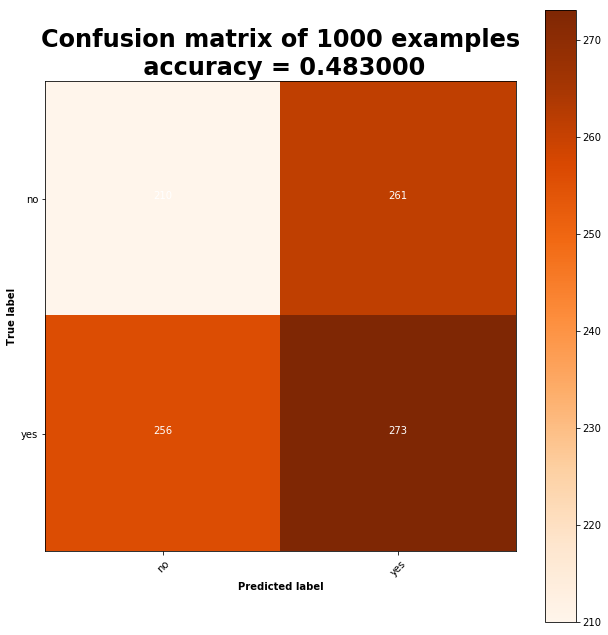

In [28]:
test_bach = next(iter(b1data.test_iter))
_, pred, labels = model.evaluate_bach(test_bach)

plot_confusion_matrix(truth=labels.numpy(),
                      predictions=pred.numpy(),
                      save=False,
                      path="rnn_confusion_matrix_b1.png",
                      classes=labels_legend)

In [29]:
test_bach.text[0:10]

tensor([[  444,  1060,  1273,  ...,   747,   941,   619],
        [    2,     2,     2,  ...,     2,     2,     2],
        [    8,    23,     7,  ...,    14,    10,    17],
        ...,
        [    2,     2,     2,  ...,     2,     2,     2],
        [    3,     3,     3,  ...,     3,     3,     3],
        [    8,    20,    24,  ...,    14,    12,    26]])

training function

In [30]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        logits = model(batch.text)
        label = batch.label.type("torch.LongTensor")
        loss = criterion(logits, label)
        acc, _, _ = model.evaluate_bach(batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc

    mean_loss = epoch_loss / len(iterator)
    mean_acc = epoch_acc / len(iterator)
        
    return mean_loss, mean_acc


def get_valid_loss(model, valid_iter, criterion):
    batch = next(iter(valid_iter))
    model.eval()
    logits = model(batch.text)
    label = batch.label.type("torch.LongTensor")
    loss = criterion(logits, label)
    return loss

def training_loop_text_classification(model, config, dataholder, model_path, verbose=True):
    """
    Train a model for text classification

    :param model: RNN classification model
    :type model: 
    :param config: image classification model
    :type config: LogisticRegression or DFN
    :param dataholder: data
    :type dataholder: DataHolder or DataHolderGentle
    :param model_path: path to save model params
    :type model_path: str
    :param verbose: param to control print
    :type verbose: bool
    """
    optimizer = optim.SGD(model.parameters(),
                          lr=config.learning_rate,
                          momentum=config.momentum)
    
    criterion = nn.CrossEntropyLoss()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = criterion.to(device)
    train_iter = dataholder.train_iter
    valid_iter = dataholder.valid_iter
    
    best_valid_loss = float("inf")
    
    for epoch in range(config.epochs):
        print("epoch = ({}/{})".format(epoch + 1, config.epochs))
        train_loss, train_acc = train(model, train_iter, optimizer, criterion)
        valid_loss = get_valid_loss(model,valid_iter, criterion)
        msg = "\ntrain_loss = {:.3f} | valid_loss = {:.3f}".format(float(train_loss),float(valid_loss))
        if float(valid_loss) < best_valid_loss:
            torch.save(model.state_dict(), model_path)
            best_valid_loss = float(valid_loss)
        if verbose:
            print(msg)
            print("train_acc = {}\n".format(train_acc))    

In [31]:
training_loop_text_classification(model, config, b1data, "rnn.pkl")

epoch = (1/15)

train_loss = 0.700 | valid_loss = 0.676
train_acc = 0.506375

epoch = (2/15)

train_loss = 0.696 | valid_loss = 0.710
train_acc = 0.50875

epoch = (3/15)

train_loss = 0.695 | valid_loss = 0.707
train_acc = 0.51625

epoch = (4/15)

train_loss = 0.691 | valid_loss = 0.733
train_acc = 0.52825

epoch = (5/15)

train_loss = 0.652 | valid_loss = 0.631
train_acc = 0.60925

epoch = (6/15)

train_loss = 0.544 | valid_loss = 0.522
train_acc = 0.727125

epoch = (7/15)

train_loss = 0.459 | valid_loss = 0.596
train_acc = 0.787

epoch = (8/15)

train_loss = 0.407 | valid_loss = 0.464
train_acc = 0.815125

epoch = (9/15)

train_loss = 0.354 | valid_loss = 0.421
train_acc = 0.849125

epoch = (10/15)

train_loss = 0.281 | valid_loss = 0.259
train_acc = 0.893375

epoch = (11/15)

train_loss = 0.219 | valid_loss = 0.282
train_acc = 0.926375

epoch = (12/15)

train_loss = 0.181 | valid_loss = 0.062
train_acc = 0.940375

epoch = (13/15)

train_loss = 0.153 | valid_loss = 0.167
train_acc =

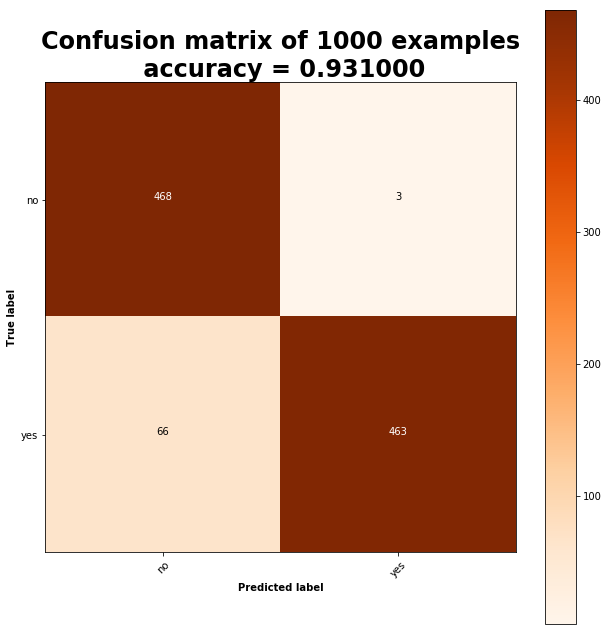

In [32]:
model = RNN(config)
model.load_state_dict(torch.load('rnn.pkl'))
_, pred, labels = model.evaluate_bach(test_bach)

plot_confusion_matrix(truth=labels.numpy(),
                      predictions=pred.numpy(),
                      save=False,
                      path="rnn_confusion_matrix.png",
                      classes=labels_legend)

## Adding visualization

In [33]:
def sentence_plot(sentences, values, title=None):
    assert len(sentences) == values.shape[0]
    for sentence in sentences:
        assert len(sentence.split()) == values.shape[1]

    all_values = []
    sentence_size = np.max([len(sentence) for sentence in sentences])
    for sid, sentence in enumerate(sentences):
        temp = np.zeros((sentence_size))
        count = 0
        for wid, word in enumerate(sentence.split()):
            temp[count: count + len(word)] = values[sid][wid]
            count = count + len(word) + 1
        all_values.append(temp)
    all_values = np.array(all_values)

    height = all_values.shape[0] 
    width = all_values.shape[1]
    
    plt.figure(figsize=(width * 1.6, height * 0.3))
    plt.title(title)
    plt.imshow(all_values, interpolation='none',
             cmap='Reds', alpha=0.5)
    plt.axis('off')
    for sid, sentence in enumerate(sentences):
        for wid, word in enumerate(sentence):
            plt.text(wid-0.2,sid+0.2,word,color='k',fontsize=12)

    plt.show()
    plt.close()

In [34]:
df_contra = train_data[train_data['label']==1]
df_non_contra = train_data[train_data['label']==0]

In [35]:
test_sentences_contra =  df_contra["text"].values
test_sentences_non_contra =  df_non_contra["text"].values

np.random.shuffle(test_sentences_contra)
np.random.shuffle(test_sentences_non_contra)

some_test_sentences_contra = test_sentences_contra[0:15]
some_test_sentences_non_contra = test_sentences_non_contra[0:15]
some_sentences = list(some_test_sentences_contra) + list(some_test_sentences_non_contra)
np.random.shuffle(some_sentences)


In [36]:
some_test_sentences_contra

array(['preston is happy preston is not happy',
       'whistler is wonderful whistler is not wonderful',
       'jefferson is delightful jefferson is not delightful',
       'hunter is silly hunter is not silly',
       'mortimer is aggressive mortimer is not aggressive',
       'royal is lively royal is not lively',
       'bradford is aggressive bradford is not aggressive',
       'wren is jolly wren is not jolly',
       'crimson is brave crimson is not brave',
       'everett is victorious everett is not victorious',
       'trent is brave trent is not brave',
       'harley is brave harley is not brave',
       'brenton is aggressive brenton is not aggressive',
       'mel is lively mel is not lively',
       'fisk is thankful fisk is not thankful'], dtype=object)

In [37]:
some_test_sentences_non_contra

array(['tessie is faithful elton is not faithful',
       'ripley is delightful madison is not witty',
       'byram is zealous lane is not faithful',
       'shaw is lively botham is not silly',
       'huxley is obedient pat is not gentle',
       'langston is proud ash is not kind',
       'chris is silly gracelynn is not eager',
       'faye is jolly averill is not nice',
       'eldridge is thankful osric is not obedient',
       'isham is wonderful mason is not proud',
       'hollis is jolly kipling is not gentle',
       'clark is silly walker is not faithful',
       'bede is proud bly is not brave',
       'nayland is nice georgia is not jolly',
       'pascoe is kind sterling is not polite'], dtype=object)

In [38]:
some_sentences 

['trent is brave trent is not brave',
 'mortimer is aggressive mortimer is not aggressive',
 'isham is wonderful mason is not proud',
 'preston is happy preston is not happy',
 'huxley is obedient pat is not gentle',
 'pascoe is kind sterling is not polite',
 'tessie is faithful elton is not faithful',
 'clark is silly walker is not faithful',
 'wren is jolly wren is not jolly',
 'jefferson is delightful jefferson is not delightful',
 'chris is silly gracelynn is not eager',
 'everett is victorious everett is not victorious',
 'mel is lively mel is not lively',
 'whistler is wonderful whistler is not wonderful',
 'crimson is brave crimson is not brave',
 'byram is zealous lane is not faithful',
 'bede is proud bly is not brave',
 'shaw is lively botham is not silly',
 'royal is lively royal is not lively',
 'hunter is silly hunter is not silly',
 'ripley is delightful madison is not witty',
 'brenton is aggressive brenton is not aggressive',
 'nayland is nice georgia is not jolly',
 'h

In [39]:
def get_hidden(sentences, model):
    all_hiddend_states = []
    all_text = []
    for example in some_test_sentences_contra:
#         print()
        text = simple_pre_process_text(example)
        all_text.append(text) 
#         print(text)
        text_as_int = [TEXT.vocab.stoi[word] for word in text.split(" ")]
        text_as_tensor = torch.Tensor(text_as_int).type('torch.LongTensor')
        text_as_tensor = text_as_tensor.view((1, text_as_tensor.shape[0]))
        text_as_tensor = text_as_tensor.t()  # putting in the format [sent len, batch size]
        pred = int(model.predict(text_as_tensor))

#         print(LABEL.vocab.itos[pred])
#         print()
        softmax = torch.nn.Softmax(dim=2)
        sig = torch.nn.Sigmoid()
        new_out = softmax(model.output)
        new_out = new_out.detach().numpy()
        new_out = new_out.reshape((len(text.split()), config.rnn_dim))
        all_hiddend_states.append(new_out)
    return np.array(all_hiddend_states)

    

In [40]:
all_hiddend_states_contra = get_hidden(some_test_sentences_contra, model)
all_hiddend_states_non_contra = get_hidden(some_test_sentences_non_contra, model)
all_hiddend_states = get_hidden(some_sentences, model)

## all_hiddend_states_contra

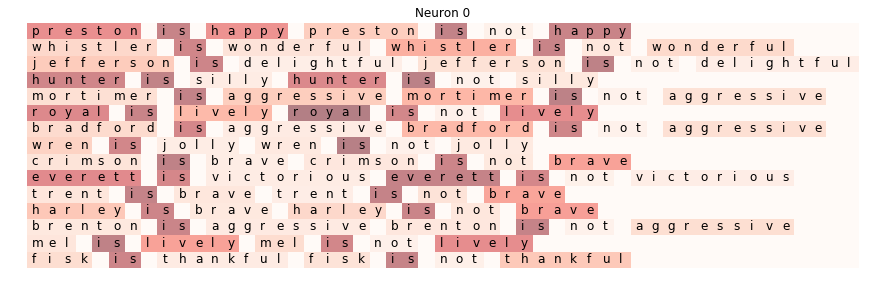

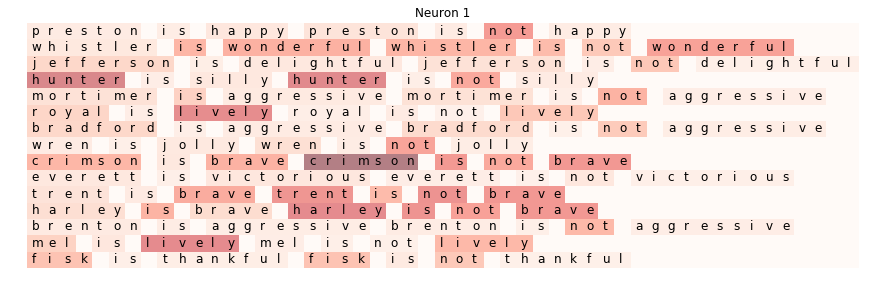

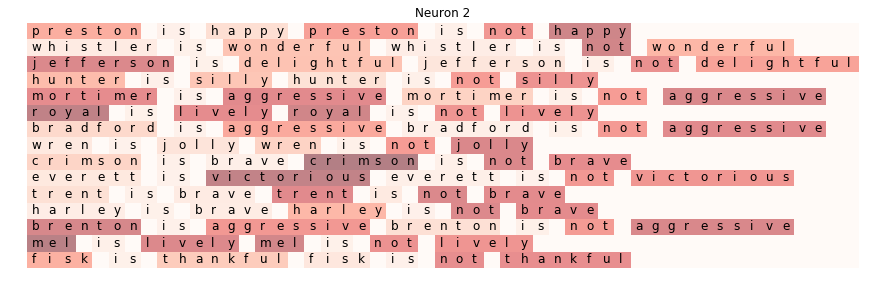

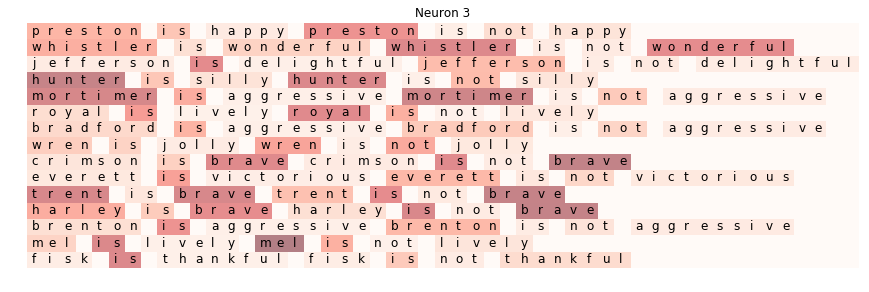

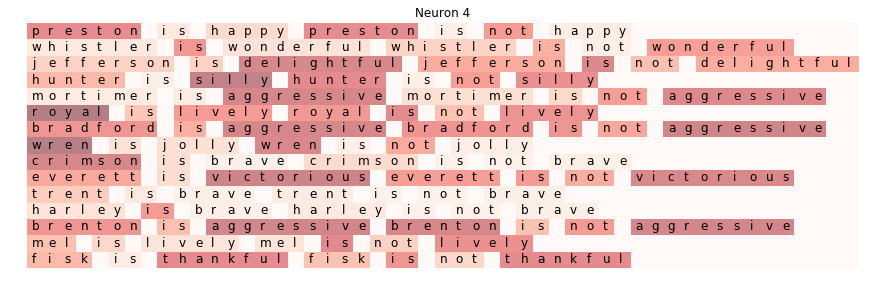

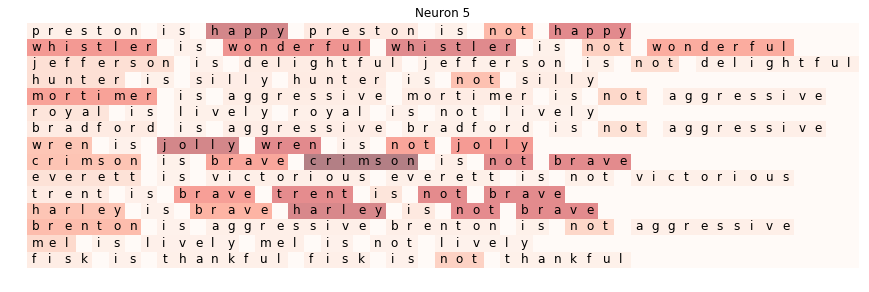

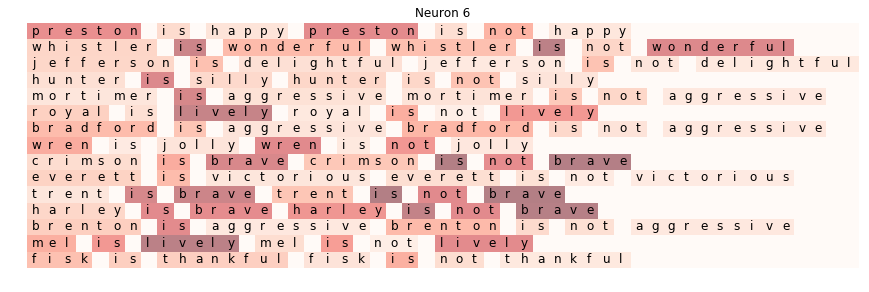

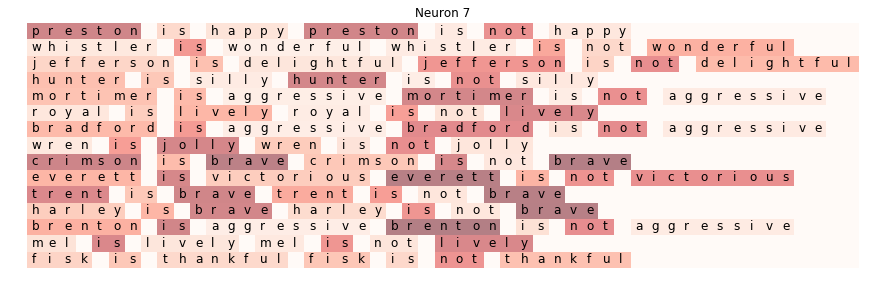

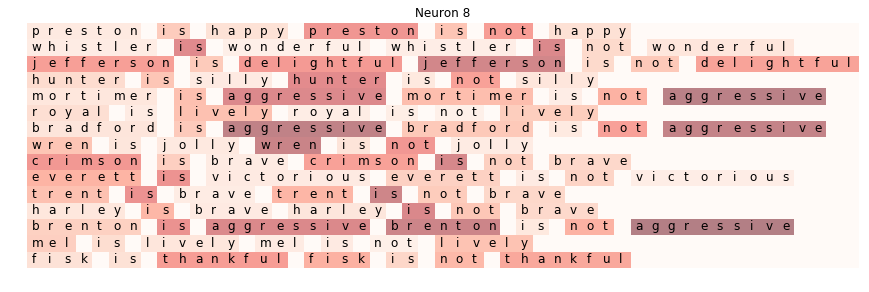

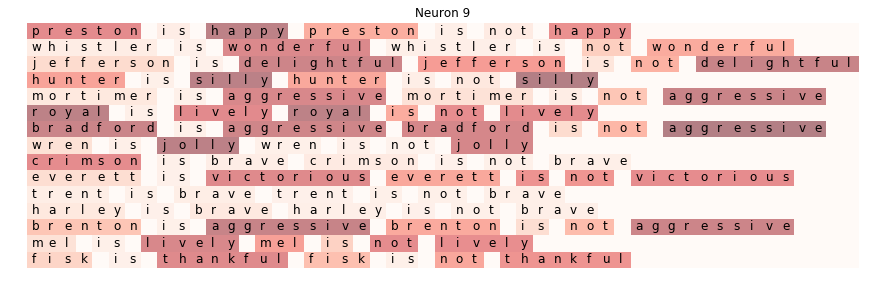

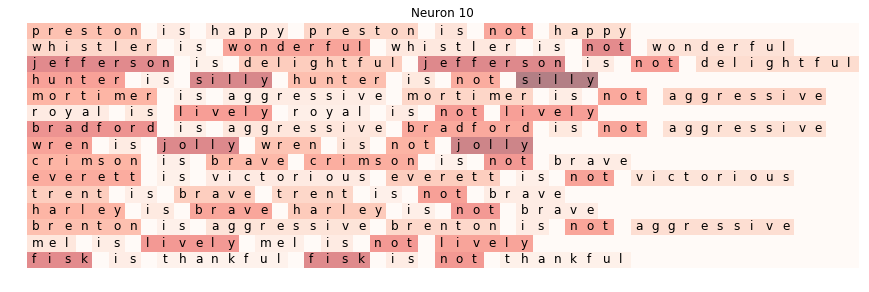

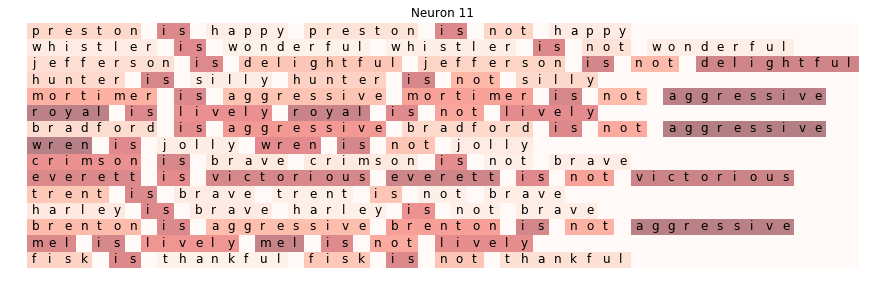

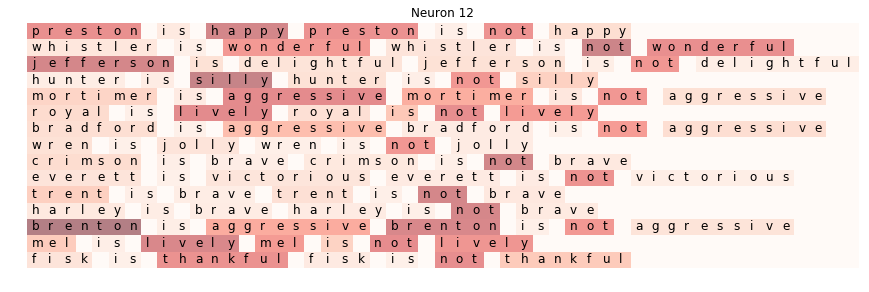

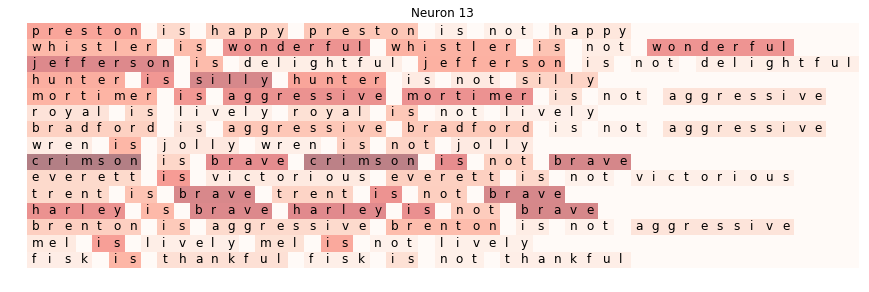

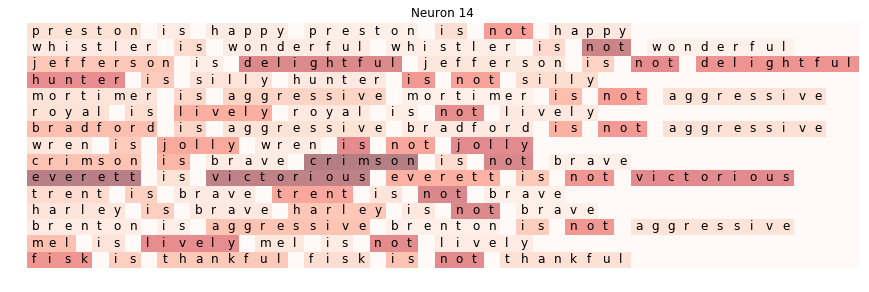

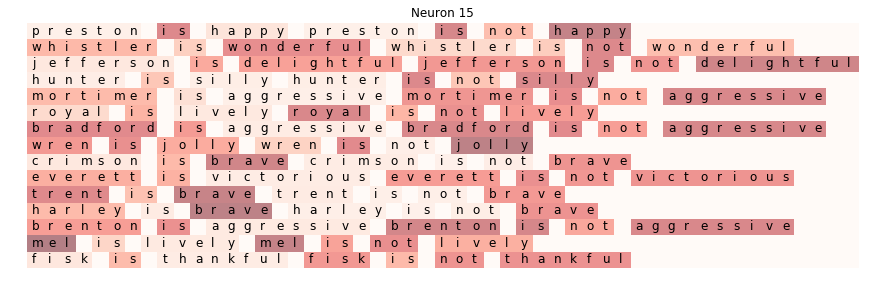

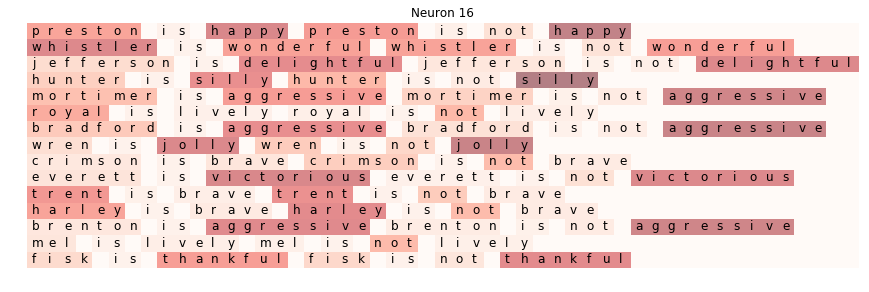

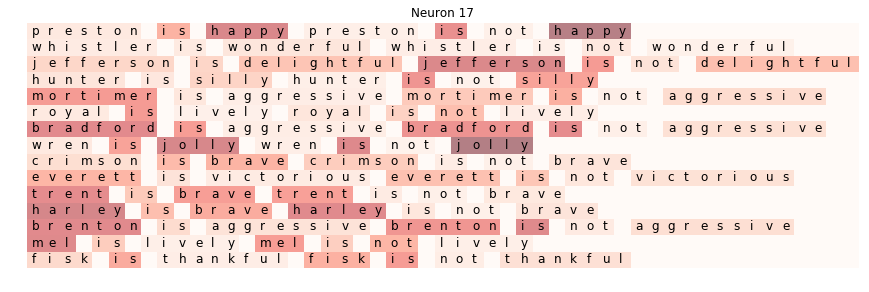

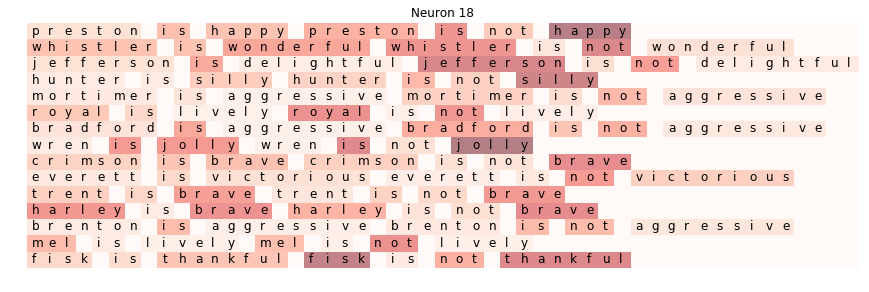

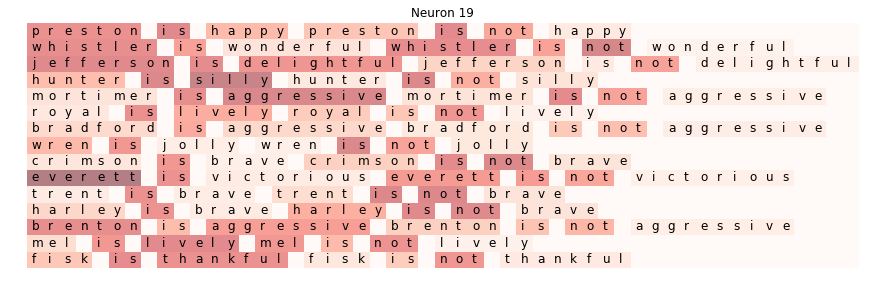

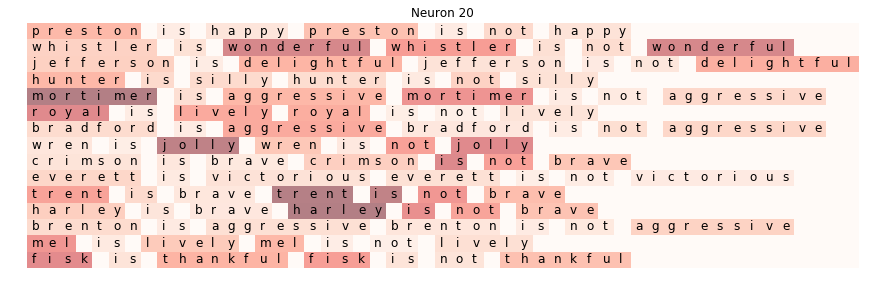

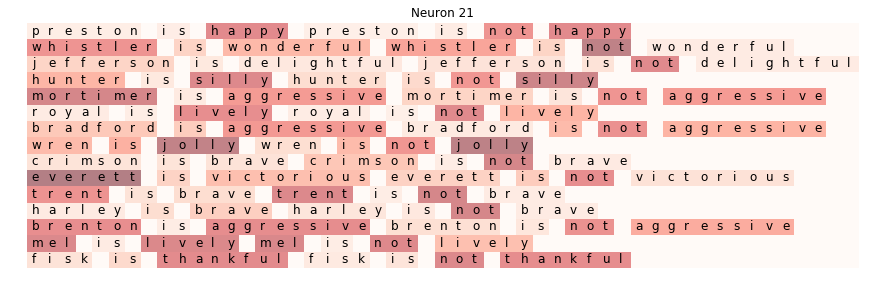

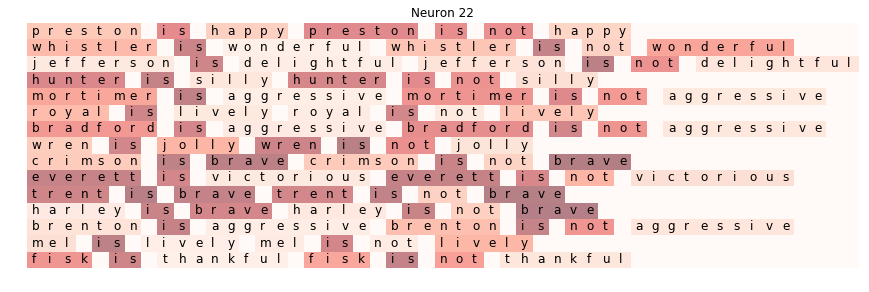

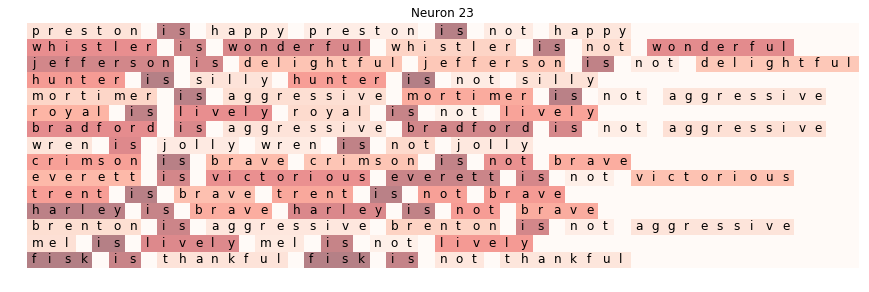

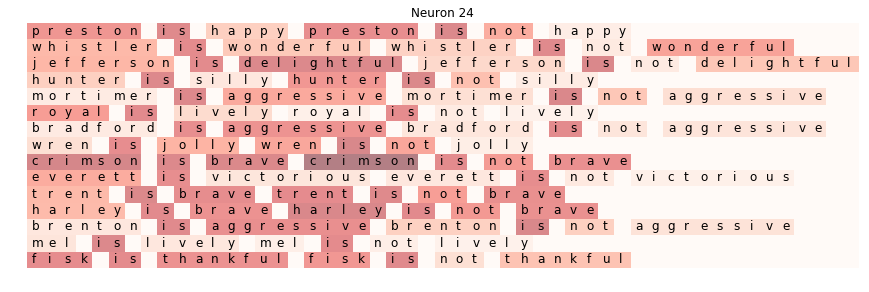

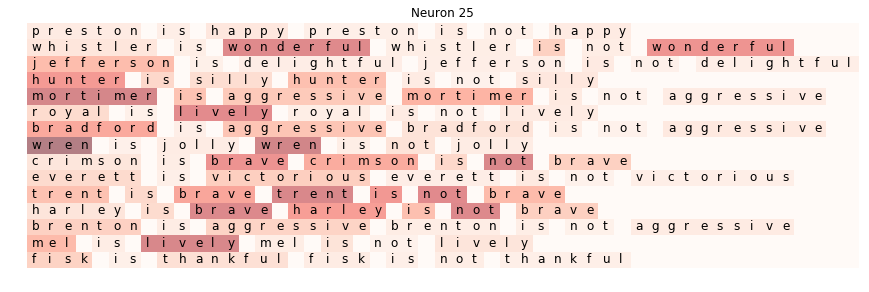

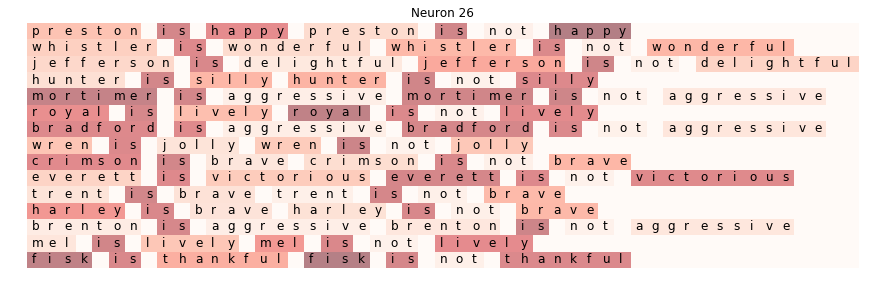

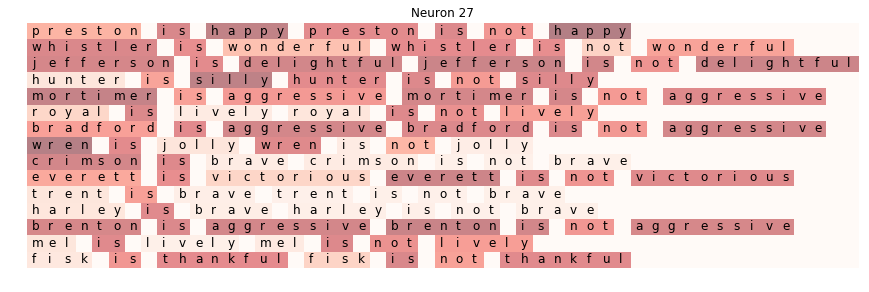

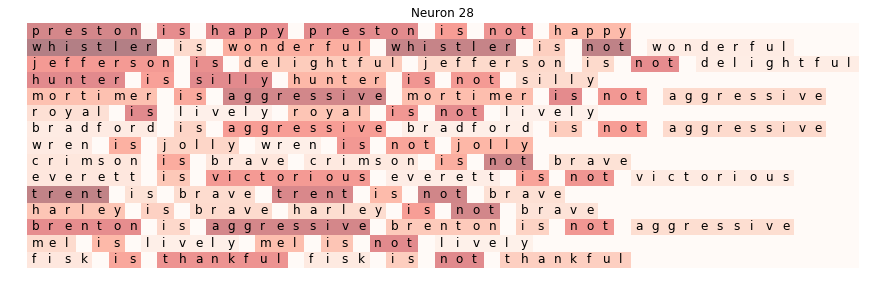

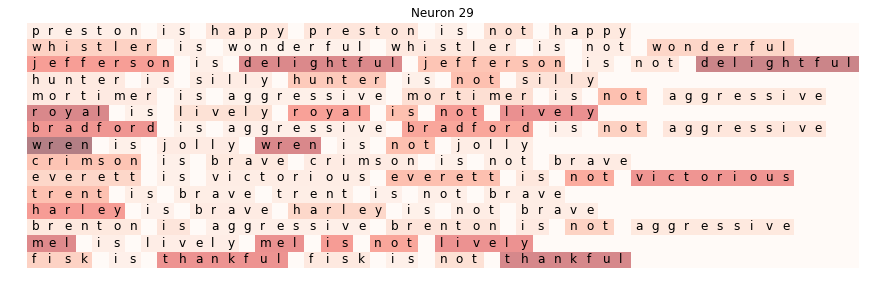

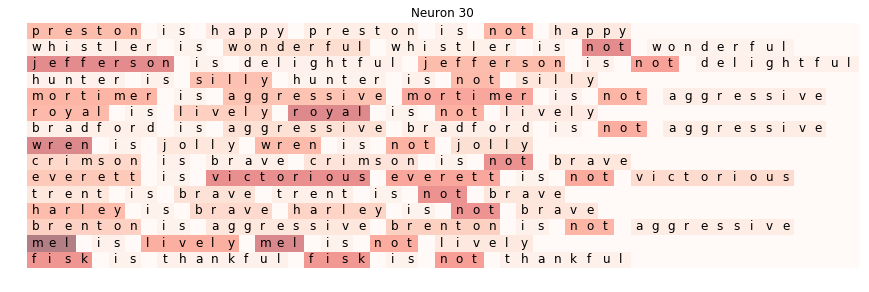

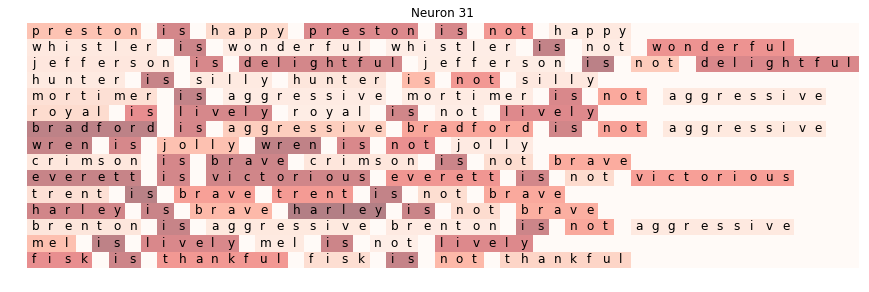

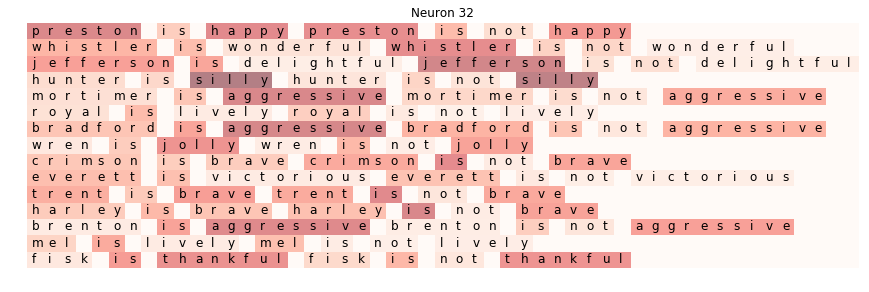

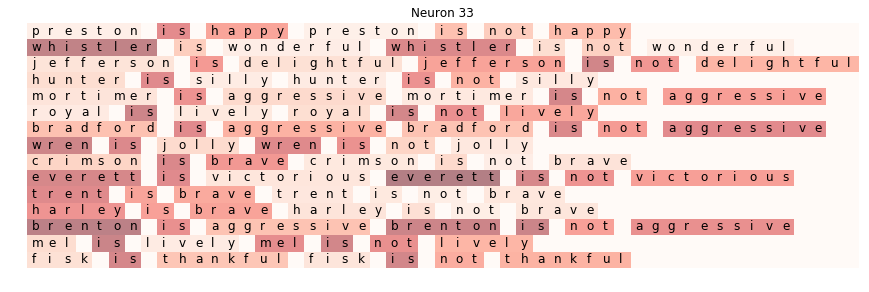

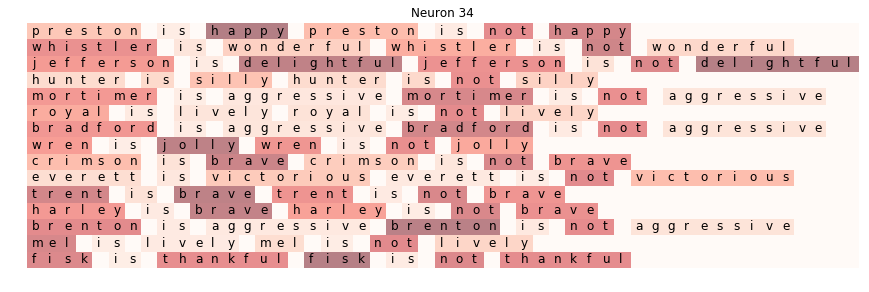

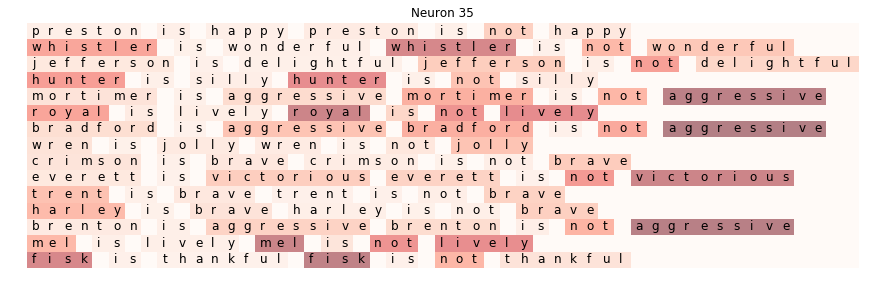

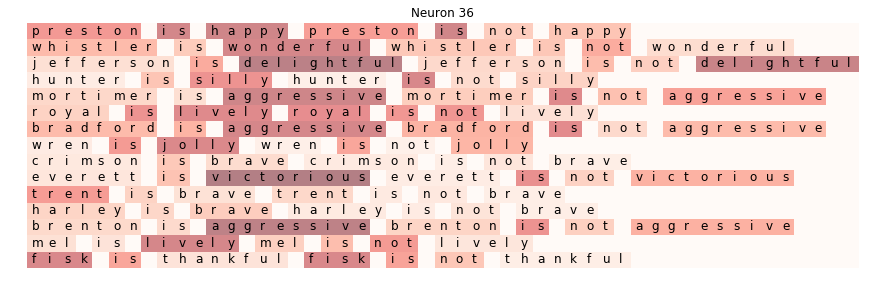

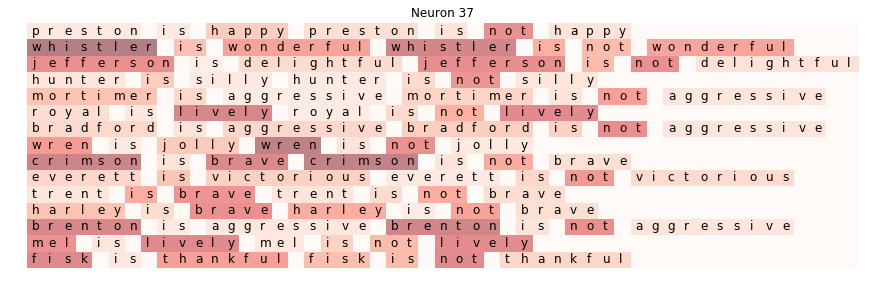

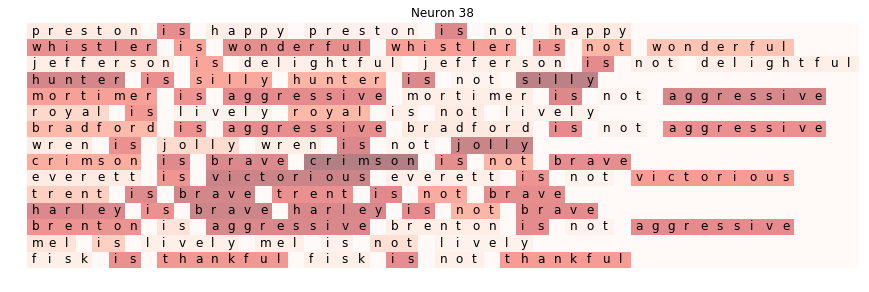

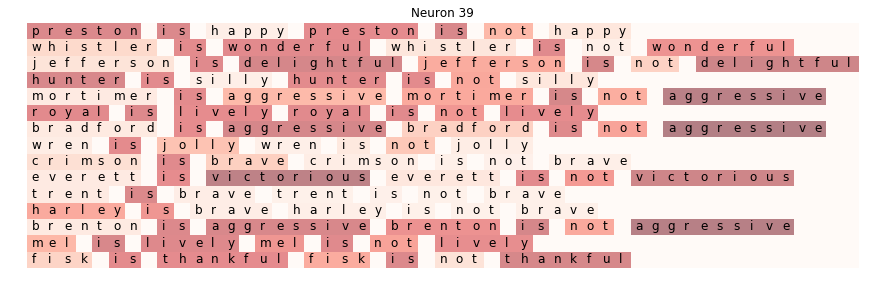

In [41]:
for dim in range(config.rnn_dim):
    sentence_plot(some_test_sentences_contra, all_hiddend_states_contra[:,:,dim], title="Neuron {}".format(dim))


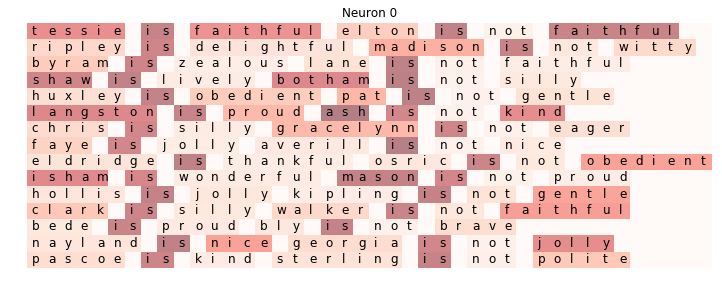

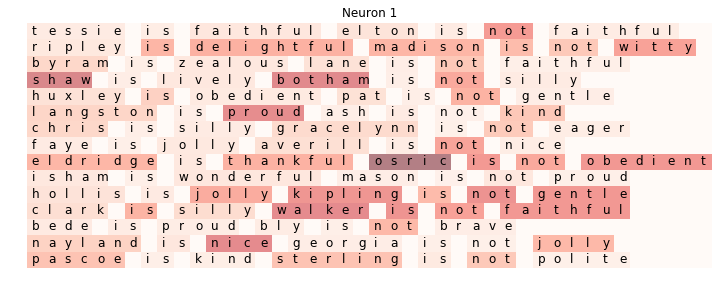

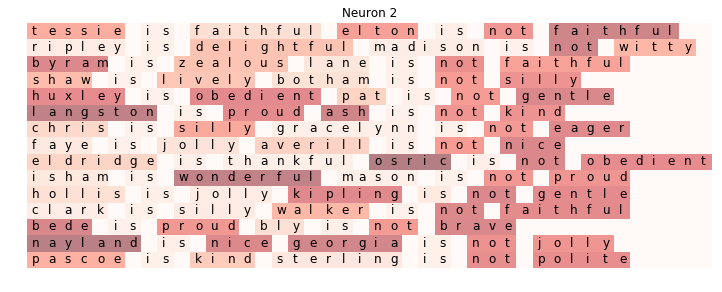

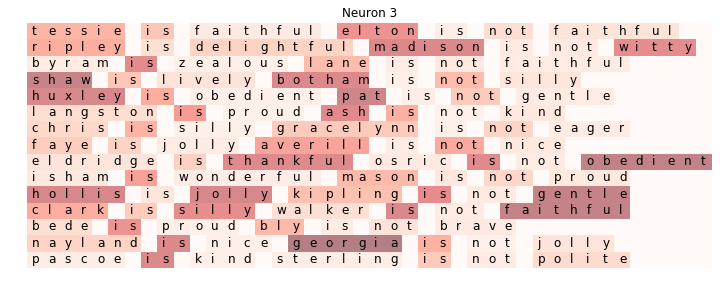

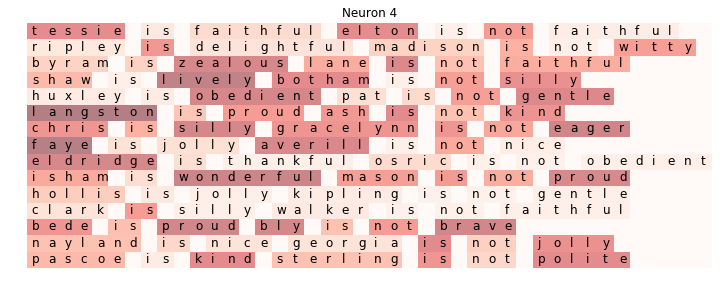

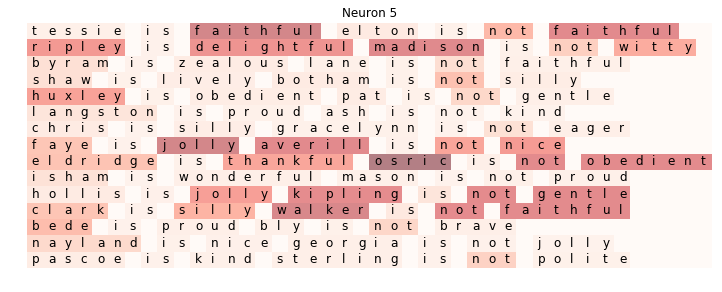

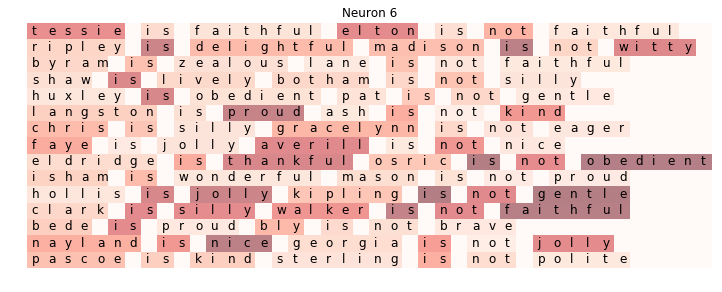

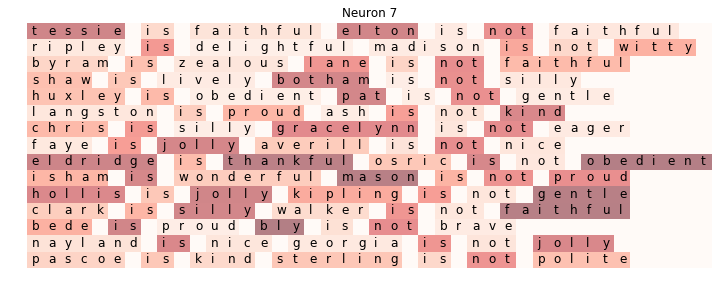

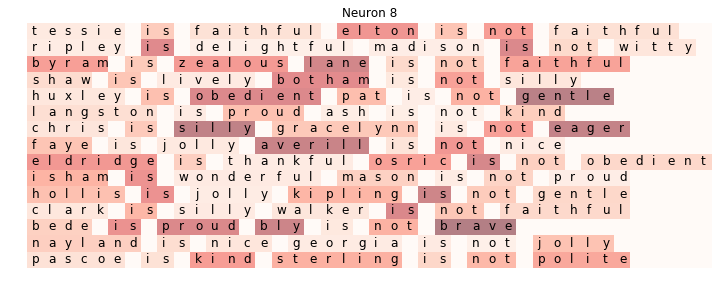

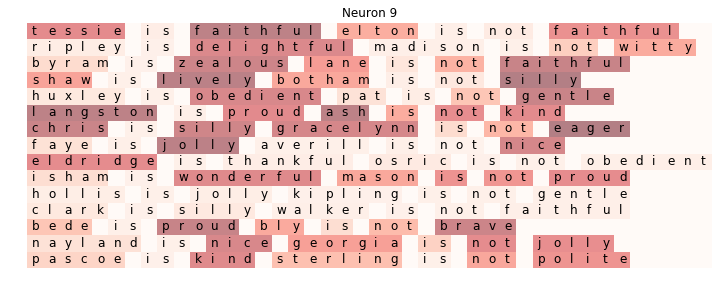

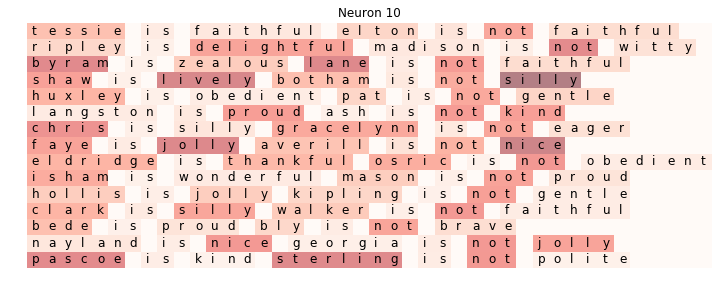

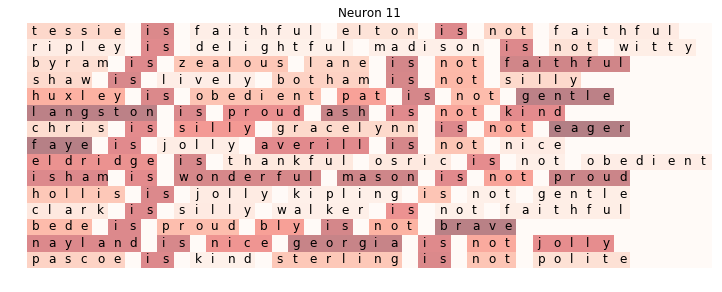

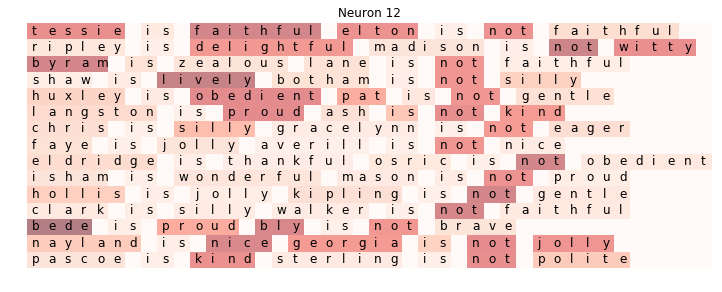

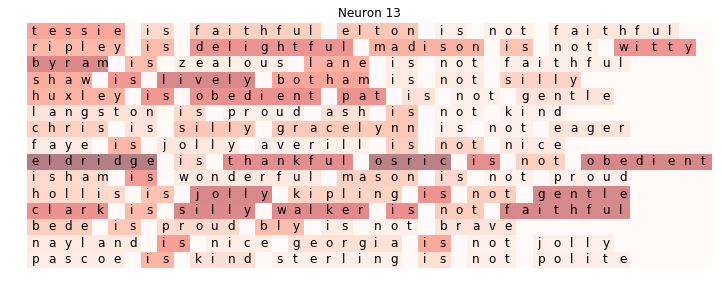

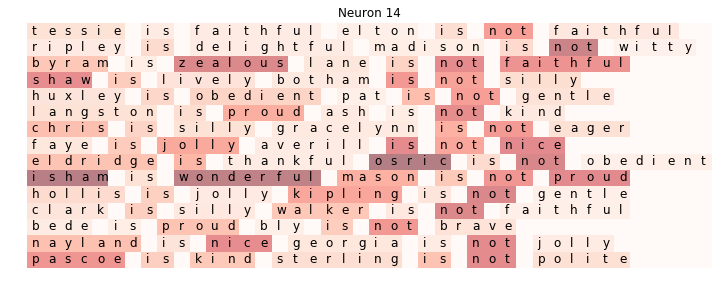

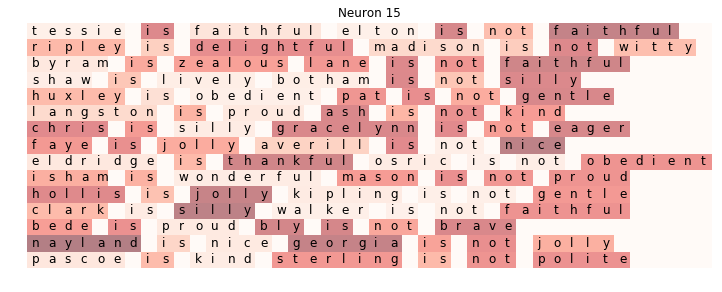

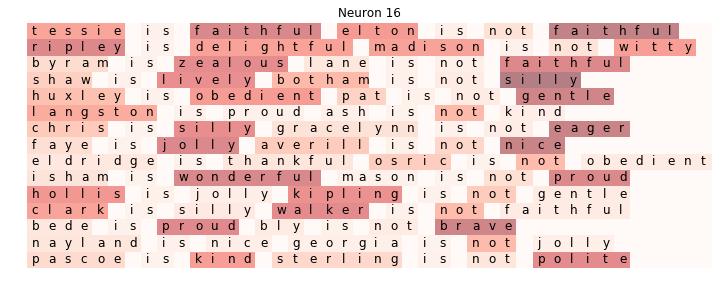

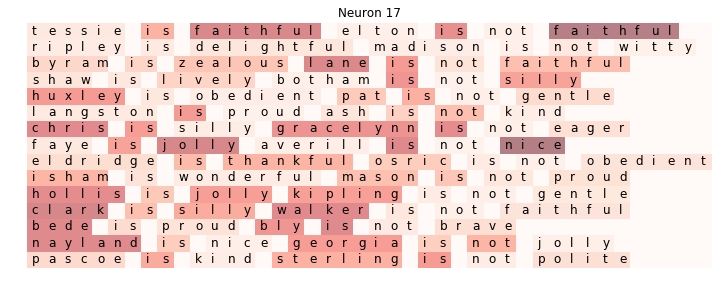

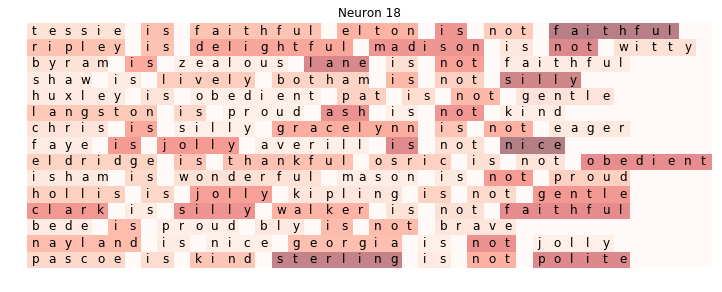

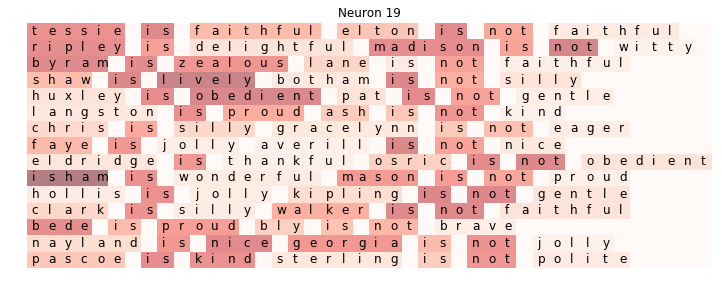

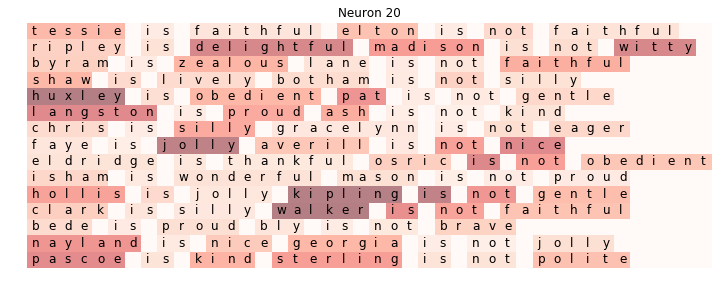

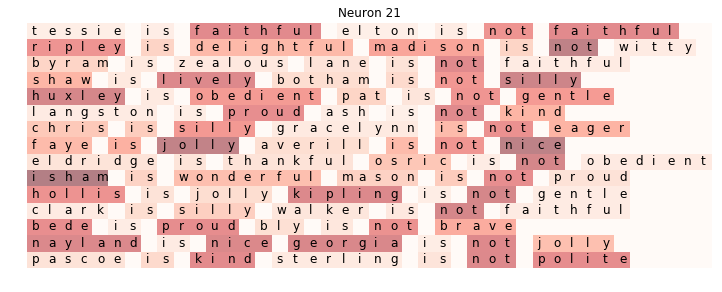

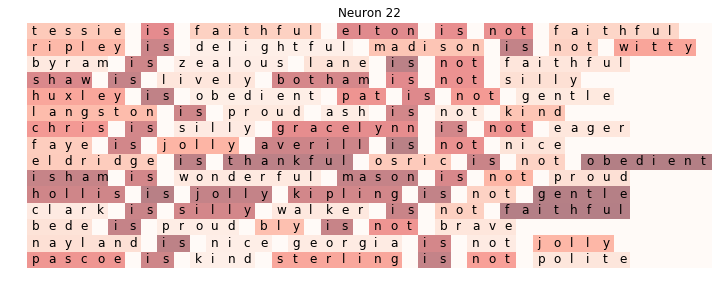

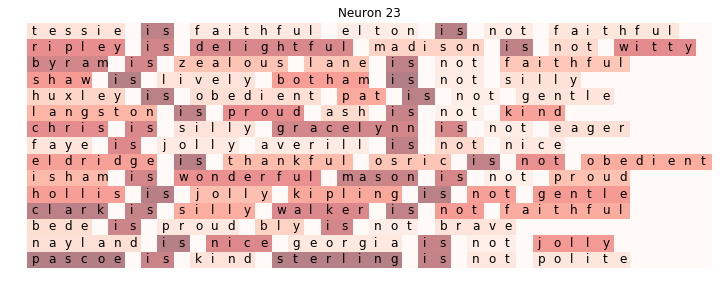

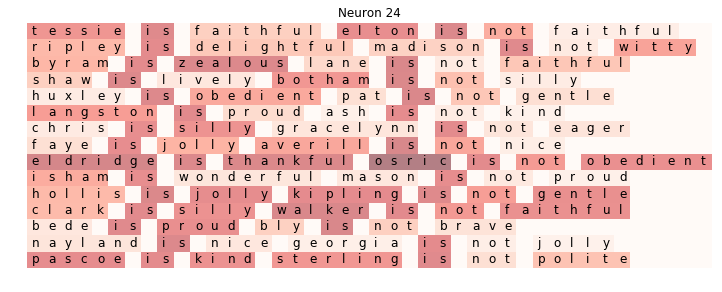

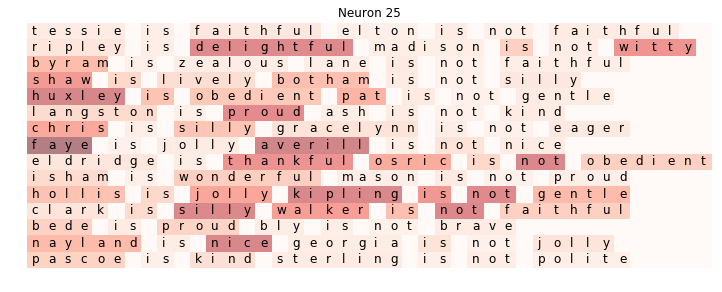

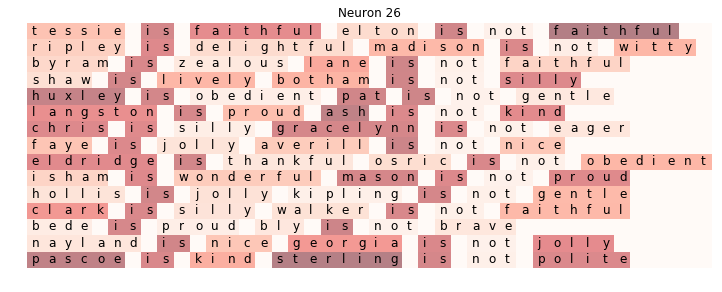

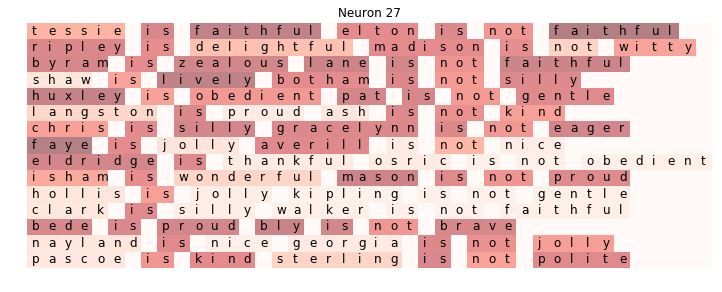

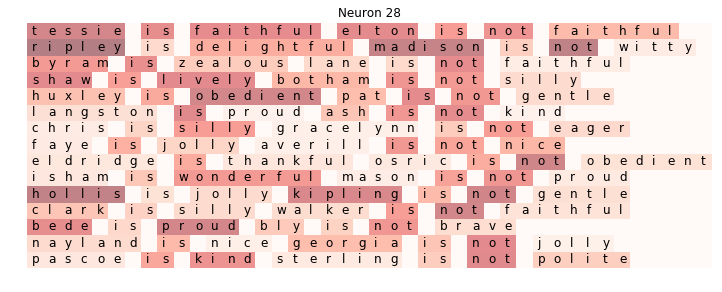

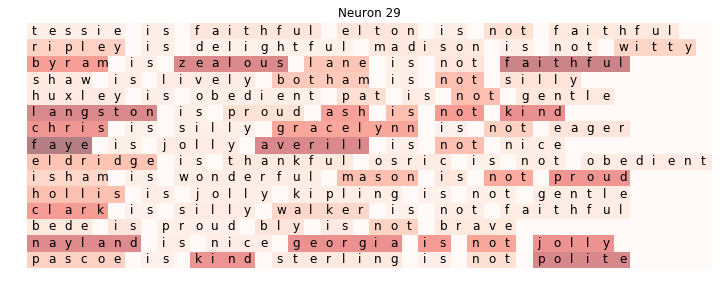

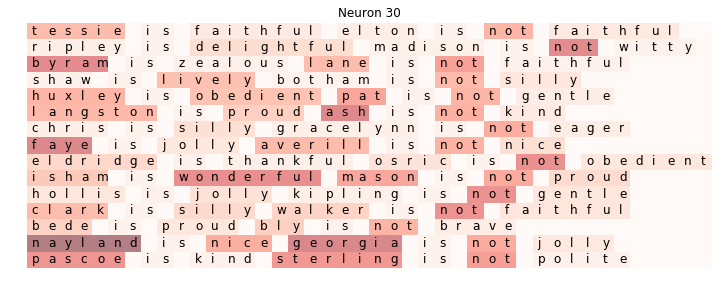

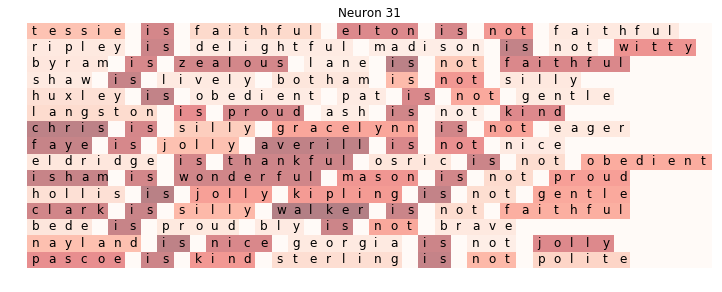

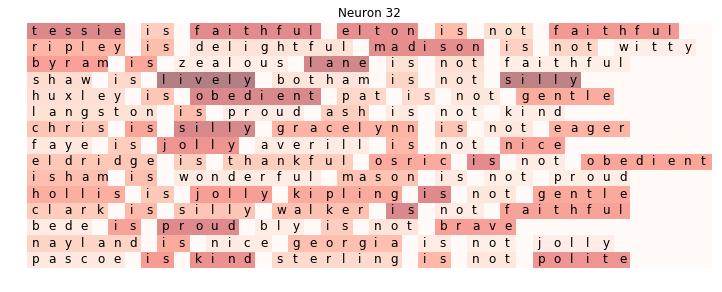

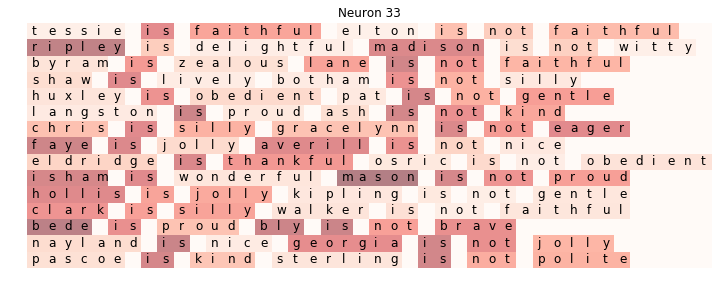

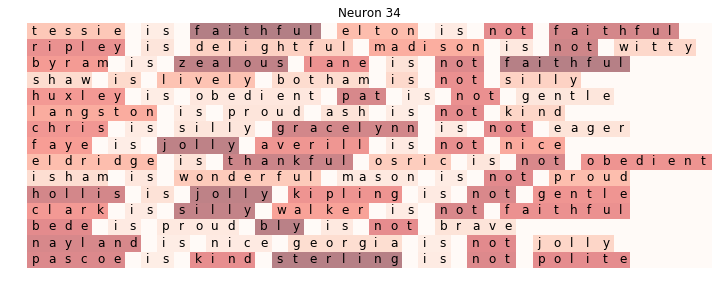

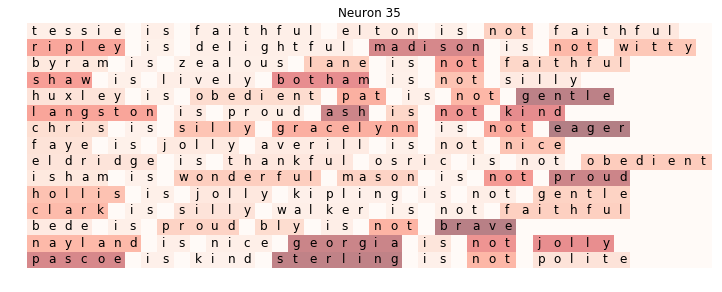

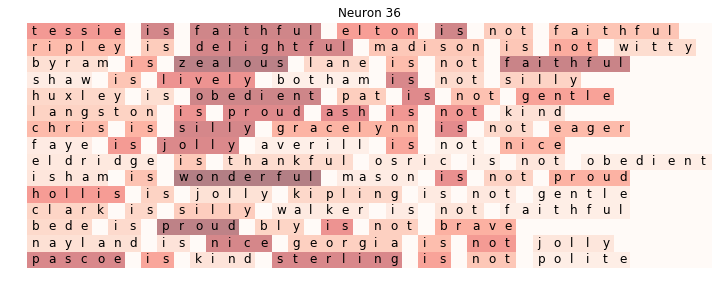

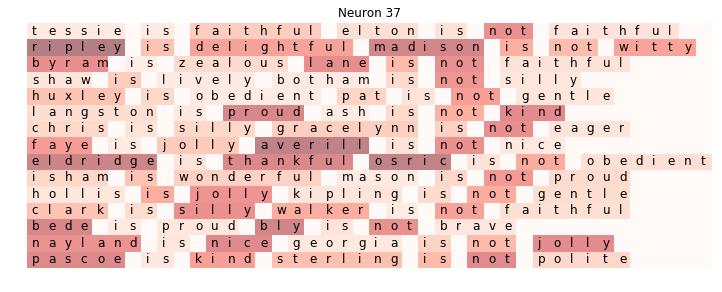

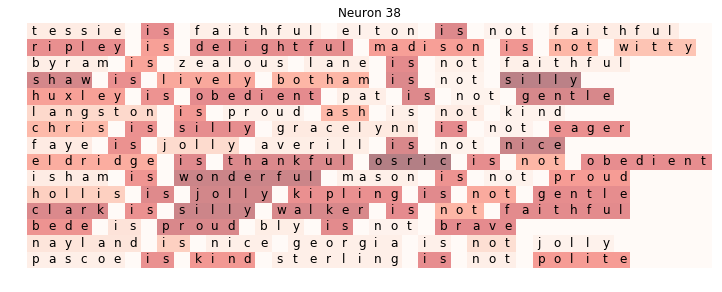

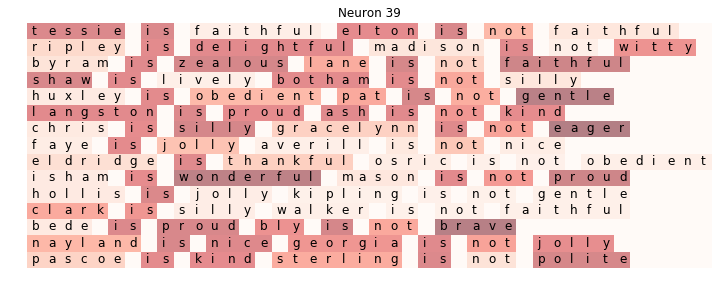

In [42]:
for dim in range(config.rnn_dim):
    sentence_plot(some_test_sentences_non_contra, all_hiddend_states_non_contra[:,:,dim], title="Neuron {}".format(dim))
